In [3]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [5]:
# Load dataset with a limited vocabulary size
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [7]:
# Maximum sequence length
max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


In [11]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Flatten(),
    Dense(128, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])



C:\Users\Rajeswari\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history=model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 157ms/step - accuracy: 0.6745 - loss: 0.6021 - val_accuracy: 0.8534 - val_loss: 0.3421
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 79s 146ms/step - accuracy: 0.9609 - loss: 0.1211 - val_accuracy: 0.8608 - val_loss: 0.3415
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 143ms/step - accuracy: 0.9981 - loss: 0.0165 - val_accuracy: 0.8566 - val_loss: 0.3958
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 150ms/step - accuracy: 0.9999 - loss: 0.0040 - val_accuracy: 0.8622 - val_loss: 0.4175
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 148ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.8632 - val_loss: 0.4385


In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8645 - loss: 0.4209
Test Accuracy: 86.38%


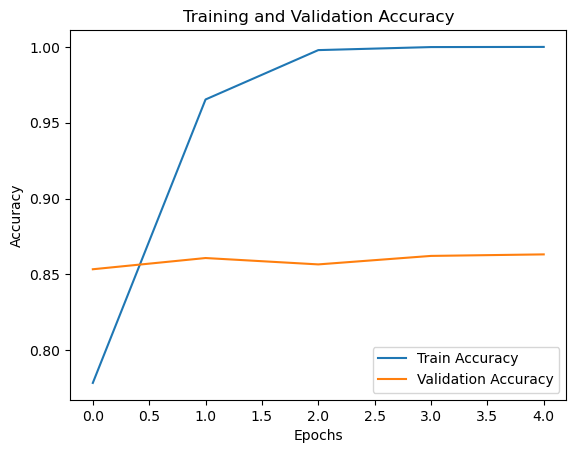

In [17]:
# Plot accuracy graph
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()
